In [2]:
import pandas as pd
import numpy as np

### **<span style="color:green">VISÃO GERAL DOS DADOS</span>**

In [3]:
PATH_GDPSET_E_LIFESET = 'C:/Users/clayt/Projetos/IDP/ml-01/dados/ocde/gdpset_e_lifeset.csv'
PATH_GDPSET_E_LIFESET_PADRONIZADOS = 'C:/Users/clayt/Projetos/IDP/ml-01/dados/ocde/gdpset_e_lifeset_padronizados.csv'

Função que recebe um path de um csv e retorna um dataframe

In [4]:
def carregar_dados(path: str):
  dados = pd.read_csv(path)
  return dados

Utilize a função carregar_dados(path: str) para obter um dataframe a partir da planilha gdpset_e_lifeset.csv (PATH_GDPSET_E_LIFESET)

In [5]:
df = carregar_dados(path=PATH_GDPSET_E_LIFESET)

Visualize as 3 primeiras linhas do arquivo com a função **head()**. 

In [6]:
df.head(3)

,sigla_pais,nome_pais,felicidade,pib_per_capita
0,AUS,Australia,7.1,72952.496199
1,AUT,Austria,7.2,73743.971264
2,BEL,Belgium,6.8,70830.907143


Utilize a função **info()** para obter informações importantes sobre o dataframe, como tipos das colunas, quantidade de valores nulos e quantidade de linhas. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sigla_pais      38 non-null     object 
 1   nome_pais       38 non-null     object 
 2   felicidade      38 non-null     float64
 3   pib_per_capita  38 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.3+ KB


Utilize função `describe()` para obter um resumo estatístico de um DataFrame ou de uma série de dados. Ela é particularmente útil para ter uma visão geral dos dados e identificar rapidamente quaisquer anomalias ou padrões.

In [9]:
df.describe()

,felicidade,pib_per_capita
count,38.000000,38.000000
mean,6.686842,61718.187749
std,0.665835,25064.636128
min,4.900000,21994.486629
25%,6.200000,48352.706374
50%,6.750000,55381.814039
75%,7.275000,72422.098935
max,7.900000,143526.892123


Como iremos implementar um modelo de regressão, é fundamental que exista correlação entre variáveis independentes e dependente. Por agora, use as colunas <u>felicidade</u> e <u>pib_per_capita</u>. Utilize a função **corr(method='spearman')** se desejar calcular a correlação de **spearman**, ou **corr()** para o método de **pearson** for mais apropriado.

In [19]:
df[['felicidade', 'pib_per_capita']].corr(method='spearman')

,felicidade,pib_per_capita
felicidade,1.000000,0.822229
pib_per_capita,0.822229,1.000000


Para problemas de regressão, o gráfico de dispersão (scatter) deve ser o primeiro a ser utilizado em suas análises. Visualize como os dados estão dispersos, buscando pela existência de uma relação linear entre as variáveis <u>felicidade</u> e <u>pib_per_capita</u>. Você pode utililizar o Matplotlib, Seaborn ou o pandas. Para esse exemplo, utilize a função **plot(kind='scatter')** do próprio dataframe pandas. **IMPORTANTE**: A variável que desejamos prever deve estar no eixo y. 

<Axes: xlabel='pib_per_capita', ylabel='felicidade'>

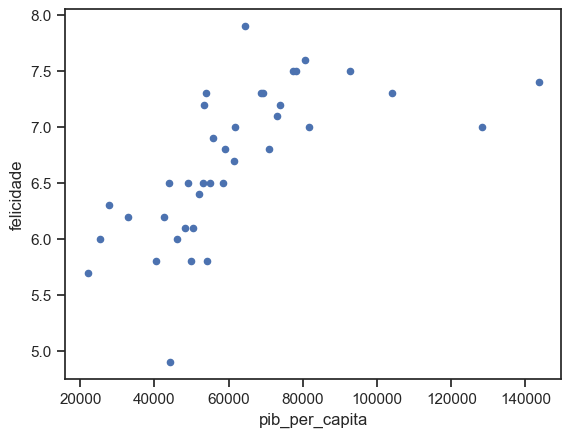

In [21]:
df.plot(kind='scatter', x='pib_per_capita', y='felicidade')

### **<span style="color:green">PREVENDO O NÍVEL DE FELICIDADE</span>**  

Utilize o train_test_split do pacote sklearn.model_selection para dividir os dados em treinamento e teste. Em geral, utilizam-se (80-70)% para treino (30-20)% por cento para testes. Por ora, utilize apenas 10% para testes. 

**Dividir dados em treino e teste é importante para:**
1. **Avaliar Desempenho**: Testar o modelo em dados não vistos.
2. **Prevenir Overfitting**: Evitar que o modelo memorize os dados de treino.
3. **Ajustar Hiperparâmetros**: Melhorar o modelo com dados de validação.
4. **Verificar Consistência**: Garantir que o modelo é robusto.
5. **Comparar Modelos**: Determinar qual modelo funciona melhor.

In [39]:
from sklearn.model_selection import train_test_split

treino, teste = train_test_split(df, train_size=0.9)

Agora, utilize os dataframes treino e teste para criar x_treino, y_treino, x_teste e y_teste. X representa a variável(eis) independente(s), o Y a variável dependente.

In [40]:
x_treino = treino[['pib_per_capita']]
y_treino = treino['felicidade']

x_teste = teste[['pib_per_capita']]
y_teste = teste['felicidade']

Treine o model (Modelo) LinearRegression com os dados de treinamento. Dica: A maioria dos modelos lineares está disponível no pacote sklearn.linear_model

In [41]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X=x_treino, y=y_treino)

LinearRegression()

Faça previsões do nível de felicidade utilizando a base de teste e o modelo treinado. Compare os valores reais e os valores previstos. 

In [42]:
previsoes = linear_model.predict(X=x_teste)
print(f'Valores Reais: {y_teste.to_list()}')
print(f'Valores previstos: {previsoes}')

Valores Reais: [5.7, 5.8, 6.9, 7.4]
Valores previstos: [5.93823544 6.57848593 6.61333787 8.36502939]
